<a href="https://colab.research.google.com/github/MatthewRomanishin/courses/blob/main/PYDNN/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
""" посмотрим, какие файлы храняться в директории """
import os
for dirname, _, filenames in os.walk('/content/gdrive/My Drive/kaggle/regression/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/gdrive/My Drive/kaggle/regression/train.csv
/content/gdrive/My Drive/kaggle/regression/sample_submission.csv
/content/gdrive/My Drive/kaggle/regression/test.csv


In [ ]:
train_df = pd.read_csv('/content/gdrive/My Drive/kaggle/regression/train.csv')
test_df = pd.read_csv('/content/gdrive/My Drive/kaggle/regression/test.csv')
sample_submission = pd.read_csv('/content/gdrive/My Drive/kaggle/regression/sample_submission.csv', index_col='id')

In [ ]:
"""Выделяем данные для обучения и преобразуем их в массивы numpy.
Функция pop() возвращает нам указанный столбец и одновременно удаляет его из таблицы.
Таким образом, когда мы присваиваем df_train в переменную x_train,
там уже нет столбца с метками правильных ответов median_house_value """
y_train = train_df.pop('median_house_value').values
x_train = train_df.values
x_test = test_df.values

In [ ]:
"""Убедимся, что количество столбцов в данных совпадает"""
x_train.shape, x_test.shape

((17000, 8), (3000, 8))

In [ ]:
# Среднее значение
mean = x_train.mean(axis=0)
# Стандартное отклонение
std = x_train.std(axis=0)
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(90, activation='relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='nadam', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=300, 
                    validation_split=0.2, 
                    verbose=2)

Epoch 1/300
425/425 - 1s - loss: 19102332928.0000 - mae: 98076.8672 - val_loss: 6801598464.0000 - val_mae: 60126.6211
Epoch 2/300
425/425 - 1s - loss: 5611205120.0000 - mae: 54283.1953 - val_loss: 4986072576.0000 - val_mae: 50873.9297
Epoch 3/300
425/425 - 1s - loss: 4640585216.0000 - mae: 49348.9805 - val_loss: 4559840256.0000 - val_mae: 48256.0273
Epoch 4/300
425/425 - 1s - loss: 4400830464.0000 - mae: 47829.7227 - val_loss: 4393157632.0000 - val_mae: 46690.6836
Epoch 5/300
425/425 - 1s - loss: 4297545728.0000 - mae: 47077.5664 - val_loss: 4390035968.0000 - val_mae: 47409.8477
Epoch 6/300
425/425 - 1s - loss: 4209473280.0000 - mae: 46505.1914 - val_loss: 4254647808.0000 - val_mae: 46025.9336
Epoch 7/300
425/425 - 1s - loss: 4132241152.0000 - mae: 45988.5039 - val_loss: 4152159488.0000 - val_mae: 45894.2812
Epoch 8/300
425/425 - 1s - loss: 4060954112.0000 - mae: 45537.2891 - val_loss: 4094848000.0000 - val_mae: 45631.4766
Epoch 9/300
425/425 - 1s - loss: 3990944000.0000 - mae: 45123.0

In [ ]:
answer = pd.read_csv('/content/gdrive/My Drive/kaggle/regression//answer/answer.csv')
y_test = answer.median_house_value.values
scores = model.evaluate(x_test, y_test, verbose=1)
print("Средняя абсолютная ошибка на тестовых данных:", round(scores[1], 4))

Визуализация качества обучения

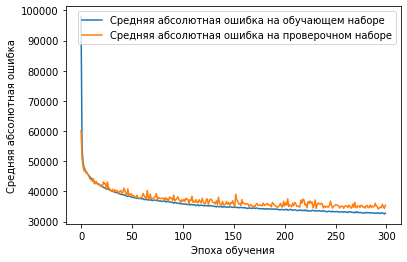

In [ ]:
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

вим данные для теста на liderboard

In [ ]:
"""делаем предсказания по всем тестовым данным"""
predictions = model.predict(x_test)
predictions

array([[ 61206.22 ],
       [ 61177.402],
       [ 68760.375],
       ...,
       [276724.75 ],
       [ 74074.734],
       [129699.23 ]], dtype=float32)

In [ ]:
"""используем файл с правильным шаблоном формата записи ответов и пишем в него наши предсказания"""
sample_submission['median_house_value'] = predictions

In [ ]:
"""to_csv - пишет табличные данные в файл '.csv' """
sample_submission.to_csv('sample_submission.csv')